In [1]:
import caspo_control
import biolqm

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

Downloading of the model

In [2]:
model = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

Conversion of the model from multivalued to Boolean 

In [3]:
inputs = {
    #"DNAdamage": 0, 
    "GrowthInhibitors":1,
    "EGFR_stimulus":1,
    "FGFR3_stimulus":1
}
target = {"Apoptosis_b1": 1, "RB1": 1}

In [4]:
cc = caspo_control.CaspoControl(model, inputs)

In [5]:
s = cc.reprogramming_to_attractor(target, maxsize=3)
s

[FromCondition('input', PermanentPerturbation(RAS=0, TP53=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(RBL2=1, TP53=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(CDC25A=0, TP53=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(TP53=1, p16INK4a=0, p21CIP=1)),
 FromCondition('input', PermanentPerturbation(CyclinE1=0, TP53=1, p16INK4a=0)),
 
 FromCondition('input', PermanentPerturbation(DNAdamage=1, PTEN=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(AKT=0, DNAdamage=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(AKT=0, ATM_b1=1, p16INK4a=0)),
 
 FromCondition('input', PermanentPerturbation(DNAdamage=1, PI3K=0, p16INK4a=0)),
 
 FromCondition('input', PermanentPerturbation(DNAdamage=1, E2F1_b1=0, p16INK4a=0)),
 
 FromCondition('input', PermanentPerturbation(DNAdamage=1, E2F1_b2=0, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(ATM_b1=1, PTEN=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturb

In [6]:
s.as_table()

,AKT,ATM_b1,ATM_b2,Apoptosis_b1,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,FGFR3,GRB2,PI3K,PTEN,RAS,RB1,RBL2,TP53,p16INK4a,p21CIP
0,,,,,,,,,,,,,,,,,,,,1,0,1
1,,,,,,,,,,,,,,,,,,,1,1,0,
2,,,,,,,,,,,,,,,,,,1,,1,,
3,,,,,,,,,,,,,,,,,0,,,1,0,
4,,,,,,,,,,1,,,,,,,,,,,0,1
5,,,,,,,,,,1,,,,,,,,,,1,0,
6,,,,,,,,,,1,,,,,,,,,1,,0,
7,,,,,,,,,,1,,,,,,,,1,,,,
8,,,,,,,,,,1,,,,,,,0,,,,0,
9,,,,,,,,,,1,,,,,,1,,,,,0,


In [7]:
s = cc.reprogramming_to_attractor(target, maxsize=2)
s

[FromCondition('input', PermanentPerturbation(DNAdamage=1, RB1=1)),
 FromCondition('input', PermanentPerturbation(ATM_b1=1, RB1=1)),
 FromCondition('input', PermanentPerturbation(RB1=1, TP53=1)),
 FromCondition('input', PermanentPerturbation(Apoptosis_b1=1, RB1=1))]

In [8]:
s.as_table()

,ATM_b1,Apoptosis_b1,DNAdamage,RB1,TP53
0,,,,1,1
1,,,1,1,
2,,1,,1,
3,1,,,1,


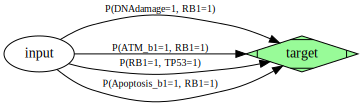

In [9]:
s.as_graph()

In [10]:
s.aliases

,EGFR_stimulus,FGFR3_stimulus,GrowthInhibitors
input,1,1,1


In [11]:
from colomoto_jupyter import tabulate

In [12]:
test = biolqm.to_minibn(model, ensure_boolean=True)
for n, v in inputs.items():
    test[n] = v
test["RB1"] = 1
test["TP53"] = 1

In [13]:
tabulate(biolqm.fixpoints(test.to_biolqm()))

,AKT,ATM_b1,ATM_b2,Apoptosis_b1,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,Growth_Arrest,MDM2,PI3K,PTEN,Proliferation,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1
1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1
